In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [56]:
data=pd.read_csv('/content/indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  580 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [58]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [59]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [60]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [61]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0],inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender']= lc.fit_transform(data['Gender'])

In [63]:
data[data.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,1,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,1,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,1,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,1,0.7,0.1,196,20,35,5.8,2.0,0.50,1


In [64]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.945712,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.320922,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.000000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<ipython-input-65-a9533a3b6a8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


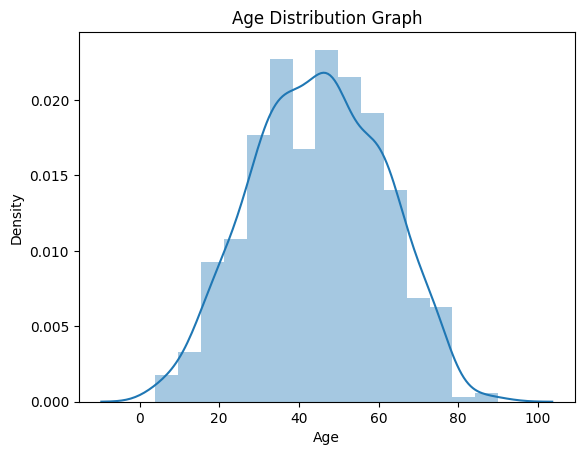

In [65]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

In [66]:
data.rename(columns={'Dataset':'outcome'},inplace=True)

<Axes: xlabel='outcome', ylabel='count'>

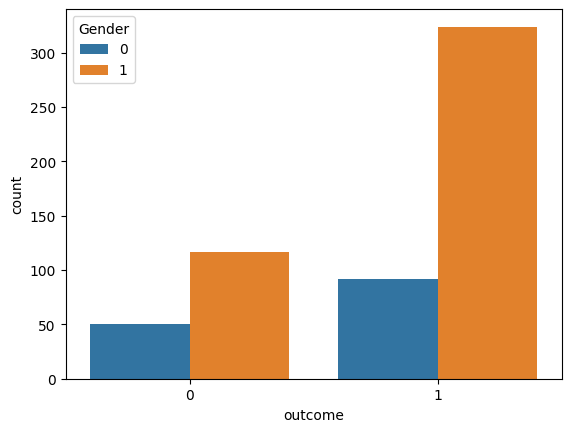

In [67]:
sns.countplot(x=data['outcome'].apply(lambda x:1 if x == 1 else 0),hue=data['Gender']
)

<Axes: >

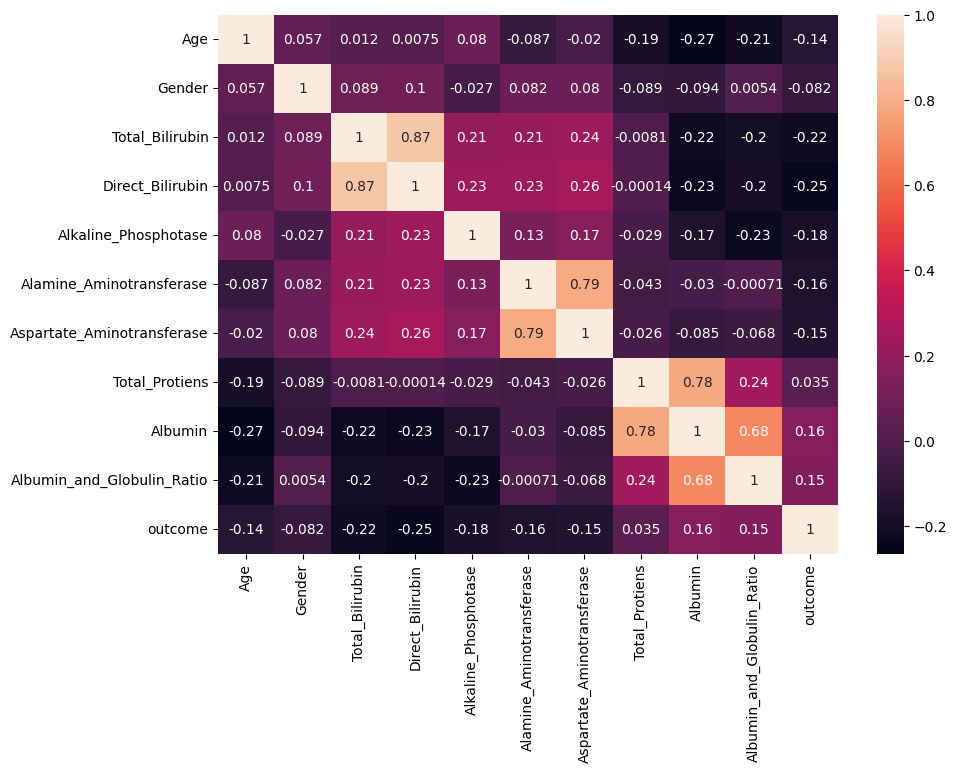

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [69]:
x=data.iloc[:,:-1]
y=data.iloc[:, -1]

In [70]:
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [71]:

from sklearn.preprocessing import scale
x_scaled= pd.DataFrame (scale(x),columns=x.columns)
x_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.142561
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.641553
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.173748
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.169308
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.701911


In [72]:
x=data.iloc[:,:-1]
y= data.outcome

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

In [74]:

from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.2,random_state=42)

In [76]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
y_train.value_counts()

1    341
2    324
Name: outcome, dtype: int64

In [78]:
x_train_smote,y_train_smote= smote.fit_resample(x_train,y_train)

In [79]:
y_train_smote.value_counts()

1    341
2    341
Name: outcome, dtype: int64

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model1= RandomForestClassifier(random_state=100)
model1.fit(x_train, y_train)

y_train = model1.predict(x_train)
y_test_sm= model1.predict(x_test)
rfc1=(accuracy_score(y_test, y_test_sm))
rfc1

0.844311377245509

In [81]:
print (classification_report(y_test,y_test_sm))

              precision    recall  f1-score   support

           1       0.84      0.81      0.82        75
           2       0.85      0.87      0.86        92

    accuracy                           0.84       167
   macro avg       0.84      0.84      0.84       167
weighted avg       0.84      0.84      0.84       167



In [82]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

y_train = model2.predict(x_train)
y_test_sm = model2.predict(x_test)
dtc1=accuracy_score(y_test, y_test_sm)
dtc1


0.7245508982035929

In [83]:
print (classification_report(y_test,y_test_sm))

              precision    recall  f1-score   support

           1       0.68      0.72      0.70        75
           2       0.76      0.73      0.74        92

    accuracy                           0.72       167
   macro avg       0.72      0.72      0.72       167
weighted avg       0.73      0.72      0.73       167



In [84]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train_smote,y_train_smote)


y_train= model3.predict(x_train)
y_test_sm = model3.predict(x_test)
knn1= accuracy_score(y_test, y_test_sm)
knn1


0.7844311377245509

In [85]:
print (classification_report(y_test,y_test_sm))

              precision    recall  f1-score   support

           1       0.80      0.69      0.74        75
           2       0.77      0.86      0.81        92

    accuracy                           0.78       167
   macro avg       0.79      0.78      0.78       167
weighted avg       0.79      0.78      0.78       167



In [86]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression ()
model4.fit(x_train,y_train)

y_train= model4.predict(x_train)
y_test_sm = model4.predict(x_test)
logi1=accuracy_score(y_test, y_test_sm)
logi1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7125748502994012

In [87]:
print (classification_report(y_test,y_test_sm))

              precision    recall  f1-score   support

           1       0.74      0.56      0.64        75
           2       0.70      0.84      0.76        92

    accuracy                           0.71       167
   macro avg       0.72      0.70      0.70       167
weighted avg       0.72      0.71      0.71       167



In [88]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
classifier = Sequential() 
classifier.add(Dense(units =100, activation = 'relu', input_dim = 10))
classifier.add(Dense(units =50,  activation = 'relu'))
classifier.add(Dense(units =1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 100, validation_split=0.4, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 98ms/step - loss: 2.9794 - accuracy: 0.2005 - val_loss: -13.2480 - val_accuracy: 0.3008
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: -20.0634 - accuracy: 0.3409 - val_loss: -31.5859 - val_accuracy: 0.3383
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: -36.2437 - accuracy: 0.3609 - val_loss: -47.1519 - val_accuracy: 0.3383
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: -51.7021 - accuracy: 0.3609 - val_loss: -62.8359 - val_accuracy: 0.3383
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: -67.1406 - accuracy: 0.3609 - val_loss: -79.5630 - val_accuracy: 0.3383
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: -84.1721 - accuracy: 0.3609 - val_loss: -98.5177 - val_accuracy: 0.3383
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: -103.3334 - accuracy: 0.3609 - val_loss: -119.9087 - val_accuracy:

In [90]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [91]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [92]:
classifier.save("liver.h5")
y_pred=classifier.predict(x_test)

6/6 [==============================] - 0s 3ms/step


In [93]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [94]:
def predict_exit(sample_value):
    sample_value=np.array(sample_value)
    sample_value=sample_value.reshape(1,-1)
    sample_value=scale(sample_value)
    return classifier.predict(sample_value)

In [95]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value) > 0.5:
    print('Prediction: Liver Patient')
else:
    print('Prediction: Healthy')

1/1 [==============================] - 0s 98ms/step
Prediction: Liver Patient


In [96]:
acc_smote=[['KNN Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote, columns=['Classification models','accuracy_score'])
Liverpatient_pred

,Classification models,accuracy_score
0,KNN Classifier,0.784431
1,RandomForestClassifier,0.844311
2,DecisionTreeClassifier,0.724551
3,LogisticRegression,0.712575


<Axes: title={'center': 'Classification models & accuracy scores after SMOTE'}, xlabel='Classification models', ylabel='accuracy_score'>

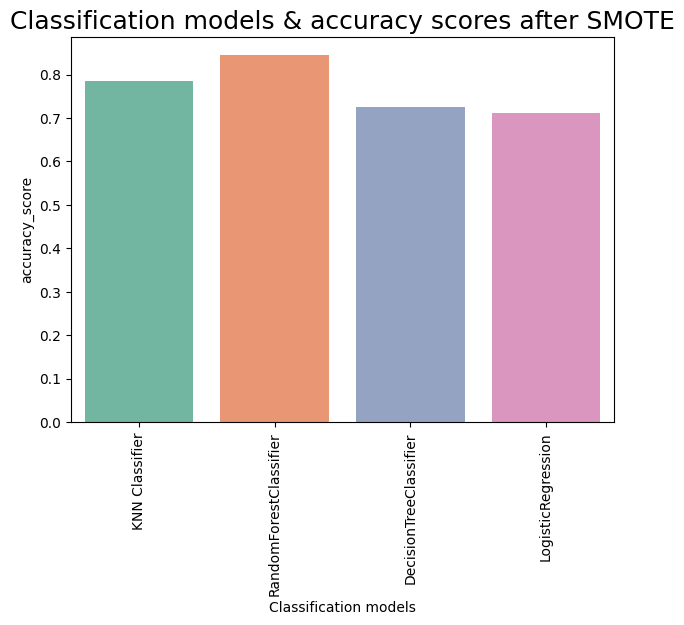

In [97]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x='Classification models',y='accuracy_score',data=Liverpatient_pred,palette='Set2')

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier ()
model.fit(x,y)

ExtraTreesClassifier()

In [99]:
model.feature_importances_

array([0.12084357, 0.02567066, 0.10726016, 0.11091055, 0.11302156,
       0.11217729, 0.11768789, 0.09330593, 0.09728421, 0.10183819])

In [100]:
dd=pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0, ascending=False)
dd

,0
Age,0.120844
Aspartate_Aminotransferase,0.117688
Alkaline_Phosphotase,0.113022
Alamine_Aminotransferase,0.112177
Direct_Bilirubin,0.110911
Total_Bilirubin,0.107260
Albumin_and_Globulin_Ratio,0.101838
Albumin,0.097284
Total_Protiens,0.093306
Gender,0.025671


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

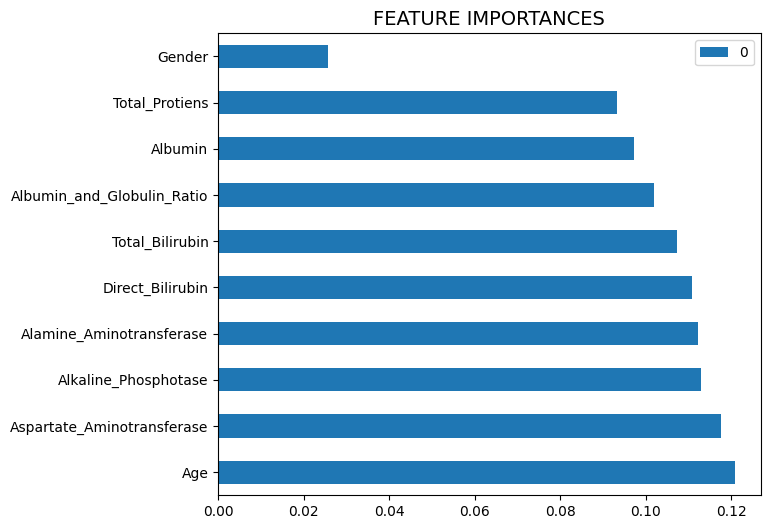

In [101]:
dd.plot(kind='barh', figsize=(7,6))
plt.title('FEATURE IMPORTANCES',fontsize=14)

In [102]:
import joblib
joblib.dump(model1,'ETC.pkl')

['ETC.pkl']

In [103]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [104]:
pickle.dump(model1,open('ETC.pkl','wb'))

In [105]:
app=Flask(__name__)
@app.route('/')
def home():
  return render_template('home.html')
@app.route('/predict')
def index():
  return render_template("index.html")

In [106]:
@app.route('/data_predict',methods=['POST'])
def predict():
  age=request.form['age']
  gender=request.form['gender']
  tb=request.form['tb']
  db=request.form['db']
  ap=request.form['ap']
  aa1=request.form['aa1']
  aa2=request.form['aa2']
  tp=request.form['tb']
  a=request.form['a']
  agr=request.form['agr']
  data=[[float(age),float(gender),float(tb),float(db),float(ap),float(aa1),float(aa2),float(tp),float(a),float(agr)]]
  model1=pickle.load(open('ETC.pkl','rb'))
  prediction=model1.predict(data)[0]
  if(prediction==1):
    return render_template('noChance.html',pediction='you have a liver disease problem,Please consult a doctor.')
  else:
    return render_template('chance.html',prediction='you dont have a liver disease problem')
if __name__=='__main__':
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
